In [7]:
import pandas as pd
df = pd.read_csv('heart_attack_dataset.csv')

In [8]:
df

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication
...,...,...,...,...,...,...,...,...
995,Male,42,125,193,Yes,Current,Typical Angina,Angioplasty
996,Male,80,186,267,Yes,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
997,Female,64,108,174,Yes,Current,Non-anginal Pain,Coronary Artery Bypass Graft (CABG)
998,Female,84,123,195,No,Current,Asymptomatic,Lifestyle Changes


In [9]:
# Frequency distribution for categorical columns
categorical_columns = ['Gender', 'Has Diabetes', 'Smoking Status', 'Chest Pain Type', 'Treatment']

for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Value counts for Gender:
Gender
Female    510
Male      490
Name: count, dtype: int64


Value counts for Has Diabetes:
Has Diabetes
Yes    517
No     483
Name: count, dtype: int64


Value counts for Smoking Status:
Smoking Status
Never      352
Current    325
Former     323
Name: count, dtype: int64


Value counts for Chest Pain Type:
Chest Pain Type
Non-anginal Pain    261
Asymptomatic        255
Typical Angina      243
Atypical Angina     241
Name: count, dtype: int64


Value counts for Treatment:
Treatment
Lifestyle Changes                      269
Coronary Artery Bypass Graft (CABG)    252
Angioplasty                            247
Medication                             232
Name: count, dtype: int64




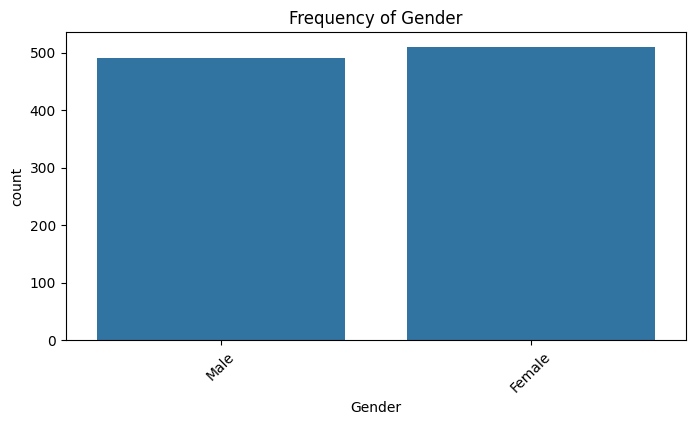

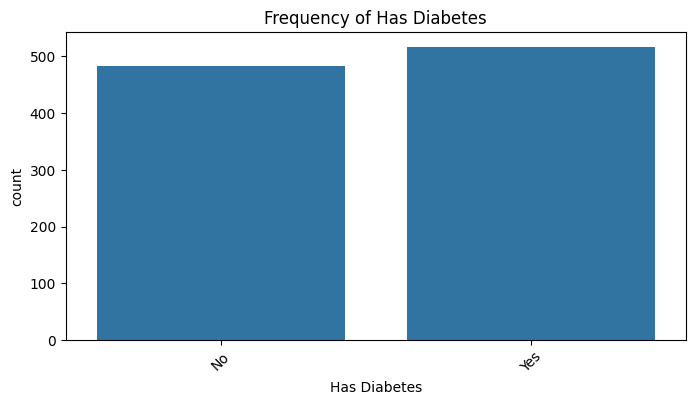

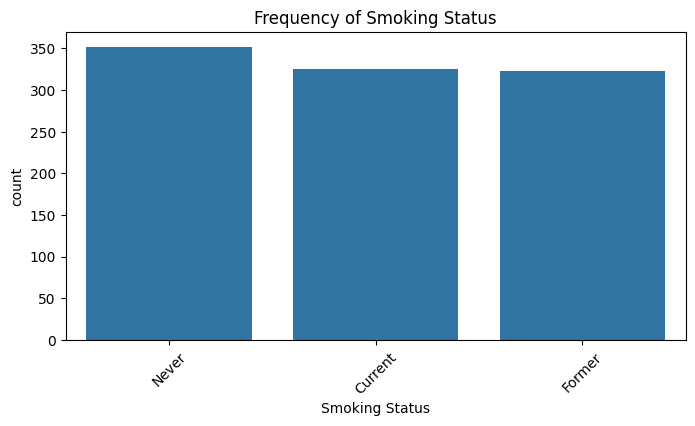

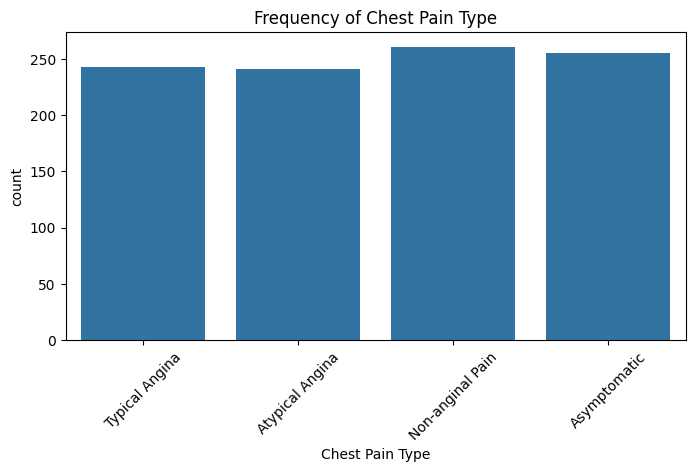

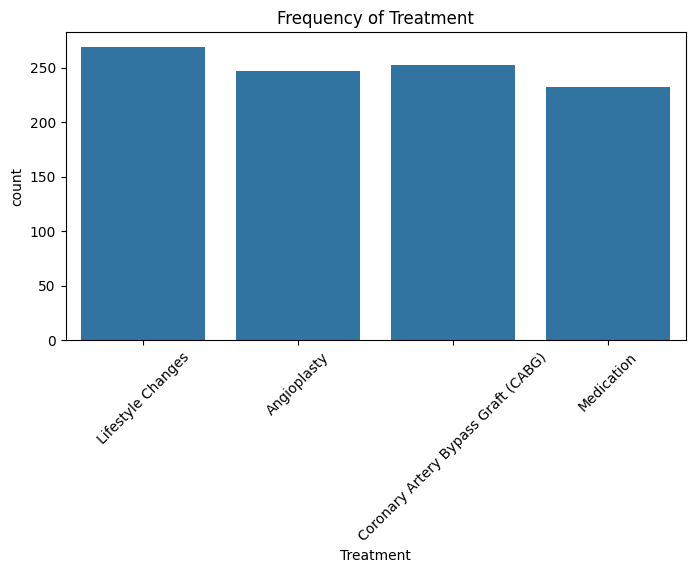

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [13]:
# Summary statistics for numerical columns
numerical_columns = ['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']

for col in numerical_columns:
    print(f"Statistics for {col}:")
    print(df[col].describe())
    print("\n")


Statistics for Age:
count    1000.000000
mean       60.338000
std        17.317496
min        30.000000
25%        45.000000
50%        60.500000
75%        76.000000
max        89.000000
Name: Age, dtype: float64


Statistics for Blood Pressure (mmHg):
count    1000.000000
mean      145.440000
std        31.756525
min        90.000000
25%       118.000000
50%       146.000000
75%       173.000000
max       199.000000
Name: Blood Pressure (mmHg), dtype: float64


Statistics for Cholesterol (mg/dL):
count    1000.000000
mean      223.789000
std        42.787817
min       150.000000
25%       185.000000
50%       225.500000
75%       259.000000
max       299.000000
Name: Cholesterol (mg/dL), dtype: float64




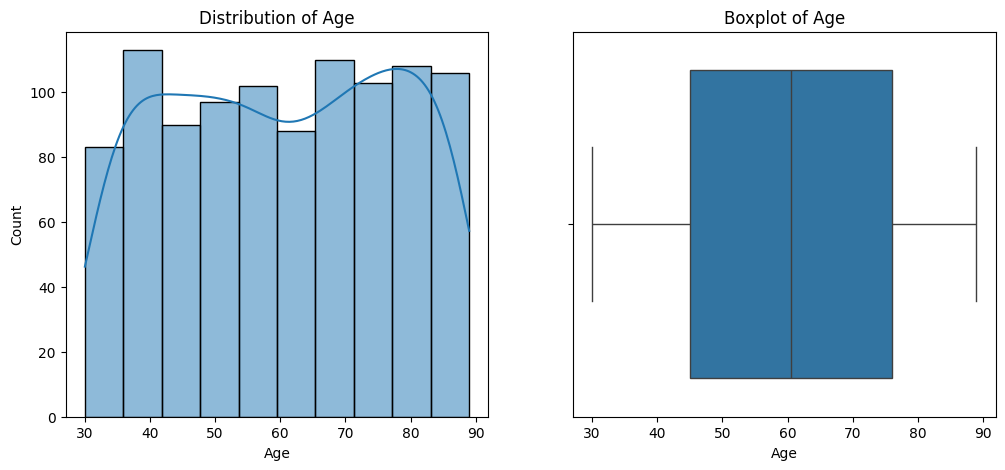

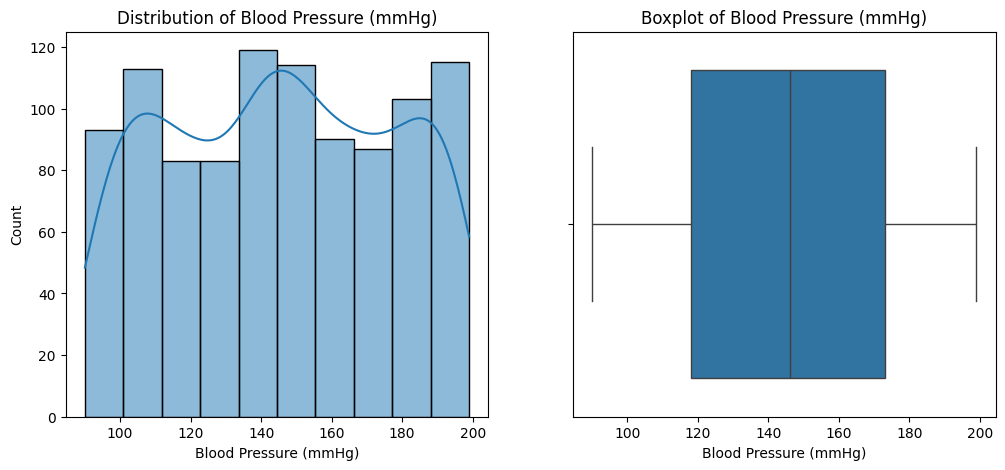

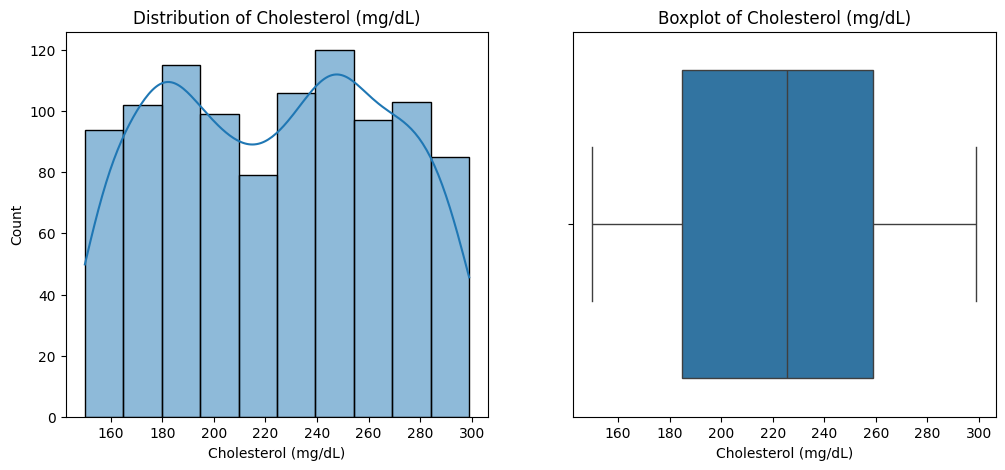

In [16]:
# Histogram and boxplot for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()


Multivariate analysis


In [19]:
# Contingency table for Gender and Chest Pain Type
contingency_table = pd.crosstab(df['Gender'], df['Chest Pain Type'])
print(contingency_table)


Chest Pain Type  Asymptomatic  Atypical Angina  Non-anginal Pain  \
Gender                                                             
Female                    134              125               134   
Male                      121              116               127   

Chest Pain Type  Typical Angina  
Gender                           
Female                      117  
Male                        126  


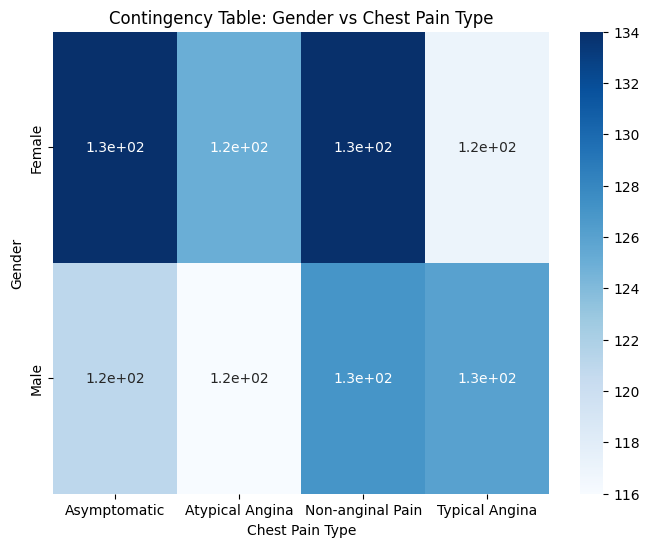

In [20]:
# Heatmap of the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues")
plt.title('Contingency Table: Gender vs Chest Pain Type')
plt.show()


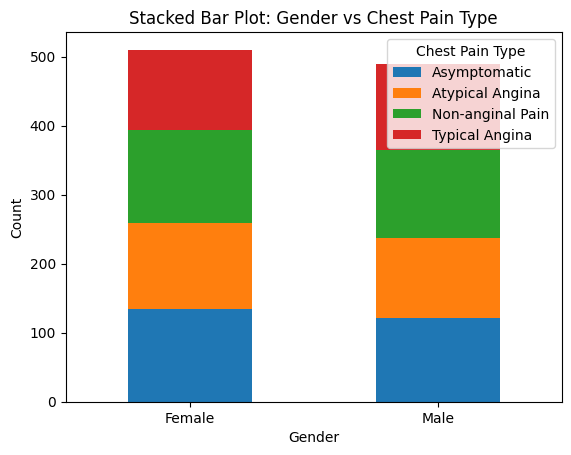

In [22]:
# Stacked bar plot for Gender vs Chest Pain Type
pd.crosstab(df['Gender'], df['Chest Pain Type']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Gender vs Chest Pain Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


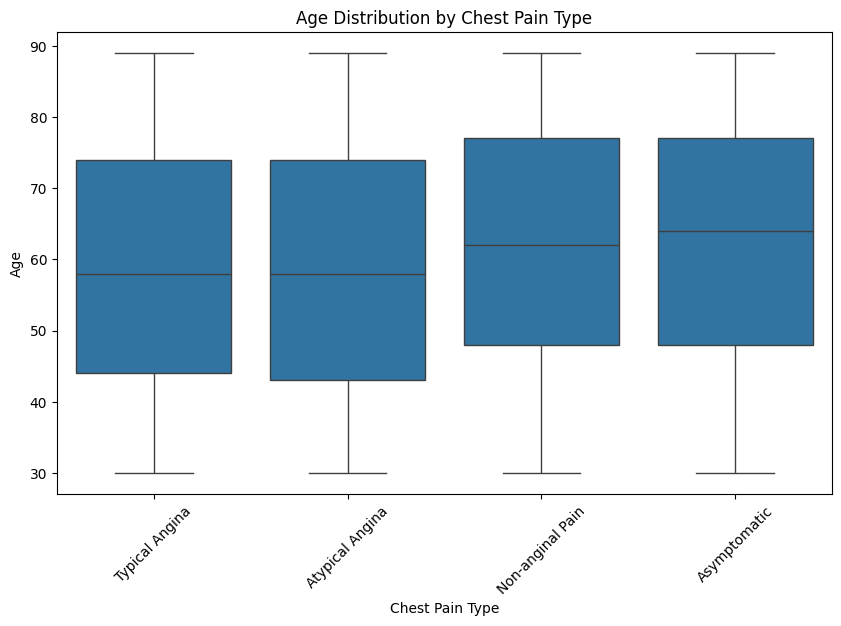

In [24]:
# Boxplot of Age distribution by Chest Pain Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Chest Pain Type', y='Age', data=df)
plt.title('Age Distribution by Chest Pain Type')
plt.xticks(rotation=45)
plt.show()


                            Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)
Age                    1.000000              -0.003303             0.001661
Blood Pressure (mmHg) -0.003303               1.000000             0.044316
Cholesterol (mg/dL)    0.001661               0.044316             1.000000


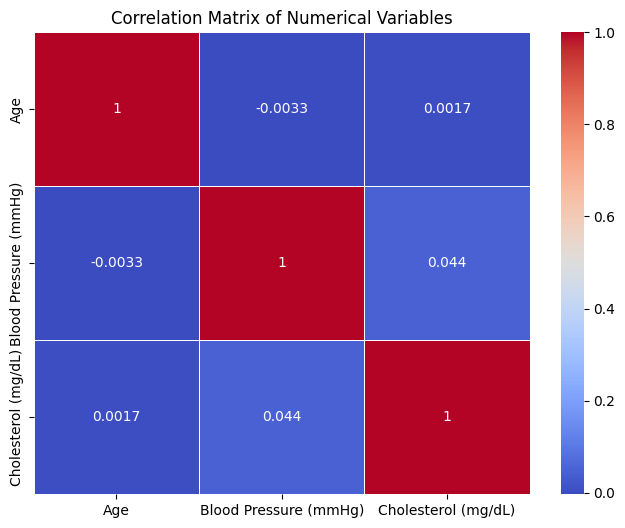

In [25]:
# Correlation matrix for numerical columns
correlation_matrix = df[['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


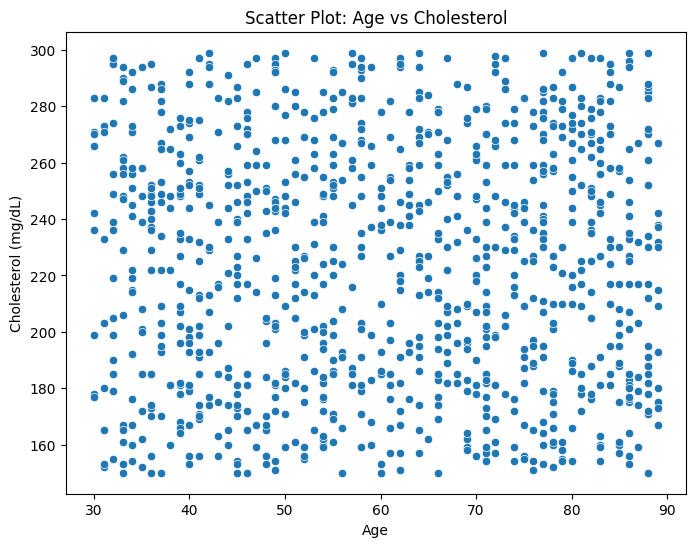

In [27]:
# Scatter plot for Age vs Cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Cholesterol (mg/dL)', data=df)
plt.title('Scatter Plot: Age vs Cholesterol')
plt.show()


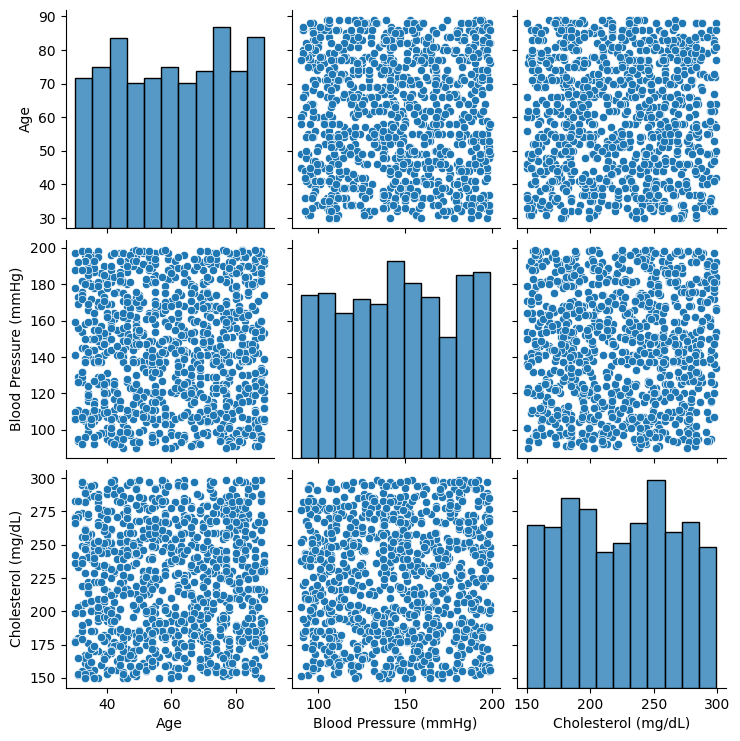

In [28]:
# Pair plot for numerical columns
sns.pairplot(df[['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']])
plt.show()


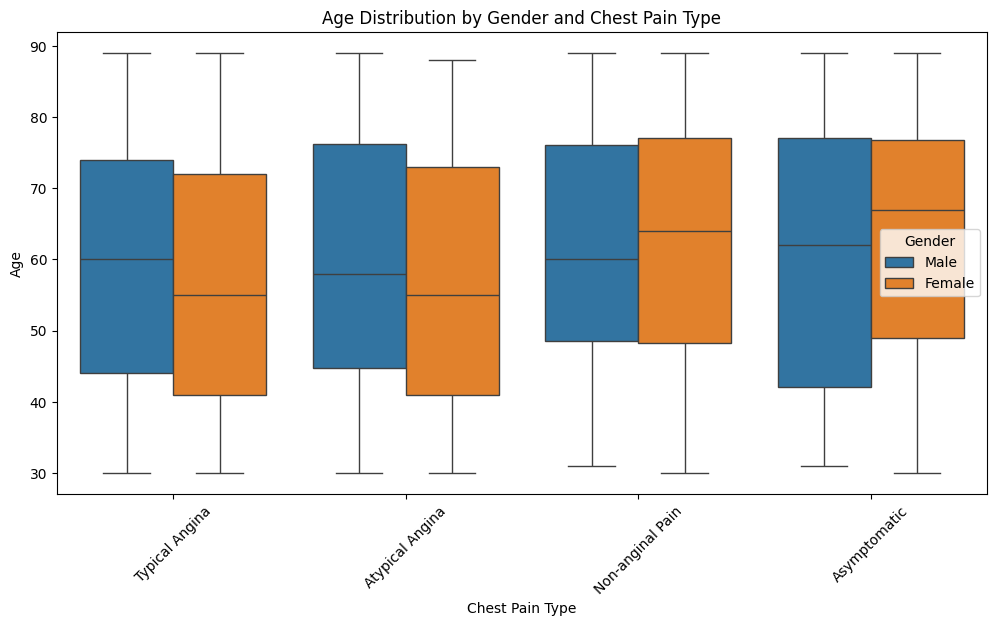

In [30]:
# Boxplot for Age by Gender and Chest Pain Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Chest Pain Type', y='Age', hue='Gender', data=df)
plt.title('Age Distribution by Gender and Chest Pain Type')
plt.xticks(rotation=45)
plt.show()
